# Walmart : predict weekly sales

---

### Import des librairies nécessaires

In [3]:
import pandas as pd
import numpy as np
import datetime as dt

import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px



In [4]:
# Chargement du fichier 'Walmart_Store_sales.csv' dans un DataFrame 'data'


data = pd.read_csv("Walmart_Store_sales.csv")


### Observation du DataFrame 

In [5]:
print("Contenu du Dataset")
display(data.head(5))

print(f"Nombre de ligne et colonne du Dataset : {data.shape[0]} lignes et {data.shape[1]} colonnes")

print("\nPourcentage de valeures Null par colonnes")
print(round((100*data.isnull().sum()/data.shape[0]),2))

print("\nComposition du Dataset")
display(data.describe(include='all'))

print("Type des features")
data.dtypes



Contenu du Dataset


,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,6.0,18-02-2011,1572117.54,NaN,59.61,3.045,214.777523,6.858
1,13.0,25-03-2011,1807545.43,0.0,42.38,3.435,128.616064,7.470
2,17.0,27-07-2012,NaN,0.0,NaN,NaN,130.719581,5.936
3,11.0,NaN,1244390.03,0.0,84.57,NaN,214.556497,7.346
4,6.0,28-05-2010,1644470.66,0.0,78.89,2.759,212.412888,7.092


Nombre de ligne et colonne du Dataset : 150 lignes et 8 colonnes

Pourcentage de valeures Null par colonnes
Store            0.00
Date            12.00
Weekly_Sales     9.33
Holiday_Flag     8.00
Temperature     12.00
Fuel_Price       9.33
CPI              8.00
Unemployment    10.00
dtype: float64

Composition du Dataset


,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
count,150.000000,132,1.360000e+02,138.000000,132.000000,136.000000,138.000000,135.000000
unique,NaN,85,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,19-10-2012,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,4,NaN,NaN,NaN,NaN,NaN,NaN
mean,9.866667,NaN,1.249536e+06,0.079710,61.398106,3.320853,179.898509,7.598430
std,6.231191,NaN,6.474630e+05,0.271831,18.378901,0.478149,40.274956,1.577173
min,1.000000,NaN,2.689290e+05,0.000000,18.790000,2.514000,126.111903,5.143000
25%,4.000000,NaN,6.050757e+05,0.000000,45.587500,2.852250,131.970831,6.597500
50%,9.000000,NaN,1.261424e+06,0.000000,62.985000,3.451000,197.908893,7.470000
75%,15.750000,NaN,1.806386e+06,0.000000,76.345000,3.706250,214.934616,8.150000


Type des features


Store           float64
Date             object
Weekly_Sales    float64
Holiday_Flag    float64
Temperature     float64
Fuel_Price      float64
CPI             float64
Unemployment    float64
dtype: object

### Partie 1 : EDA et prétraitement des données pour le machine learning

<function matplotlib.pyplot.show(close=None, block=None)>

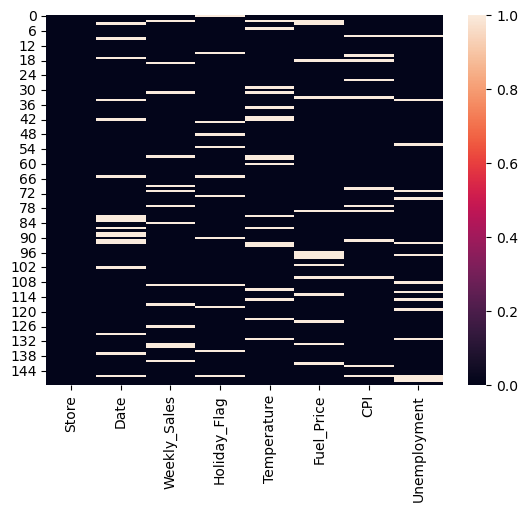

In [6]:
# Visualisation des données manquantes sous forme graphique (heatmap)

plt.Figure(figsize=(20,20))
sns.heatmap(data.isnull())
plt.show

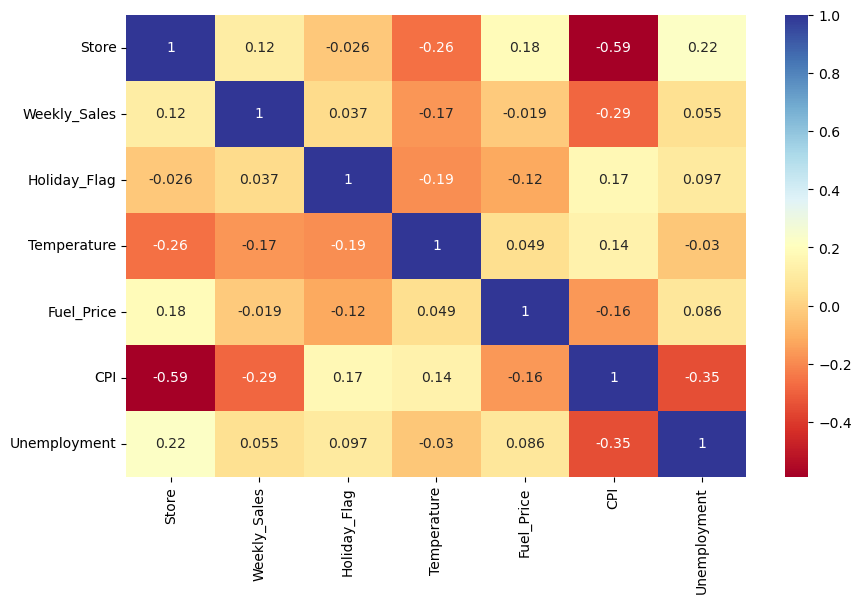

In [7]:

data_corr = data.drop('Date', axis=1) # Suppression de la feature 'Date' aui est un format Object

plt.figure(figsize=(10,6))
sns.heatmap(data_corr.corr(),cmap='RdYlBu',annot=True)
plt.show()

### conclusion

Traitement de valeur manquante :

- Weekly_Sales : il s'agit de la Target, il faut donc supprimer tous les observations manquantes.
- Date : Impossible de remplacer ces valeurs manquantes, il faut donc la aussi supprimer ces observations.
- Weekly_Sales, Holiday_Flag, Temperature, Fuel_Price, CPI, Unemployment : Traitement dans préproccessing.

Traitement du format des features : 

- Store           float64 (à modifier car représente le nom du magazin cad un transform vers un format Objet )
- Date             object (à transformer en format date )
- Weekly_Sales    float64
- Holiday_Flag    float64
- Temperature     float64
- Fuel_Price      float64
- CPI             float64
- Unemployment    float64




In [8]:
# Suppression des valeurs manquantes de la Target

print(f"Avant : {data.shape[0]}")
data = data.dropna(axis=0, subset=['Weekly_Sales'])
print(f"Après : {data.shape[0]}")


Avant : 150
Après : 136


In [9]:
# Suppression des valeurs manquantes de Date

print(f"Avant : {data.shape[0]}")
data = data.dropna(axis=0, subset=['Date'])
print(f"Après : {data.shape[0]}")

Avant : 136
Après : 118


In [10]:
# Reset index suite suppression des 
data.reset_index(drop=True, inplace=True)
data.head()

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,6.0,18-02-2011,1572117.54,NaN,59.61,3.045,214.777523,6.858
1,13.0,25-03-2011,1807545.43,0.0,42.38,3.435,128.616064,7.470
2,6.0,28-05-2010,1644470.66,0.0,78.89,2.759,212.412888,7.092
3,4.0,28-05-2010,1857533.70,0.0,NaN,2.756,126.160226,7.896
4,15.0,03-06-2011,695396.19,0.0,69.80,4.069,134.855161,7.658


In [11]:
# Conversion du format date

data['Date'] = pd.to_datetime(data['Date'], format="%d-%m-%Y")
data.dtypes


Store                  float64
Date            datetime64[ns]
Weekly_Sales           float64
Holiday_Flag           float64
Temperature            float64
Fuel_Price             float64
CPI                    float64
Unemployment           float64
dtype: object

In [12]:
data["Day"] = data['Date'].dt.day
data["Month"] = data['Date'].dt.month
data["Year"] = data['Date'].dt.year
data["Dayofweek"] = data['Date'].dt.dayofweek
data.head()

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,Day,Month,Year,Dayofweek
0,6.0,2011-02-18,1572117.54,NaN,59.61,3.045,214.777523,6.858,18,2,2011,4
1,13.0,2011-03-25,1807545.43,0.0,42.38,3.435,128.616064,7.470,25,3,2011,4
2,6.0,2010-05-28,1644470.66,0.0,78.89,2.759,212.412888,7.092,28,5,2010,4
3,4.0,2010-05-28,1857533.70,0.0,NaN,2.756,126.160226,7.896,28,5,2010,4
4,15.0,2011-06-03,695396.19,0.0,69.80,4.069,134.855161,7.658,3,6,2011,4


In [13]:
# Nombre de valeur unique pour la feature 'Dayofweek'

data['Dayofweek'].unique()

array([4], dtype=int64)

Cette feature ne sera pas utile pour le modèle de training ( colonne à supprimer )

In [14]:
# Supprimer colonnes inutiles ( Date, Dayofweek )

data = data.drop(data[['Date', 'Dayofweek']],axis=1)


In [15]:
# Renommer feature 'Store' pour une meilleur compéhension et un format Catégoriel

data['Store'] = data.apply(lambda x : "Walmart_" + str(x["Store"]) , axis=1)
data.head()


,Store,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,Day,Month,Year
0,Walmart_6.0,1572117.54,NaN,59.61,3.045,214.777523,6.858,18,2,2011
1,Walmart_13.0,1807545.43,0.0,42.38,3.435,128.616064,7.470,25,3,2011
2,Walmart_6.0,1644470.66,0.0,78.89,2.759,212.412888,7.092,28,5,2010
3,Walmart_4.0,1857533.70,0.0,NaN,2.756,126.160226,7.896,28,5,2010
4,Walmart_15.0,695396.19,0.0,69.80,4.069,134.855161,7.658,3,6,2011


## Recherche et traitement des outliers

In [16]:
# Graphique à moustache permettant de repérer visuellement des 'Outliers'

import plotly.graph_objects as go
from plotly.subplots import make_subplots

fig = make_subplots(rows = 1, cols = 4, subplot_titles = ("Temperature", "Fuel_Price", "CPI", "Unemployment")) #, "Fuel_Price", "CPI", "Unemployment"))

fig.add_trace(
    go.Box(
        y = data["Temperature"]),
        row = 1,
        col = 1,
        
)

fig.add_trace(
    go.Box(
        y = data["Fuel_Price"]),
        row = 1,
        col = 2
)

fig.add_trace(
    go.Box(
        y = data["CPI"]),
        row = 1,
        col = 3
)

fig.add_trace(
    go.Box(
        y = data["Unemployment"]),
        row = 1,
        col = 4
)

fig.update_layout(
        title = go.layout.Title(text = "Représentation des valeurs abérantes", x = 0.5),
        showlegend = False)

# fig.update_xaxes(title_text="Temp", row=1, col=1)

In [17]:
# Traitement des outliers présents sur le graphique (feature 'Unemployment')

high = data['Unemployment'].mean() + data['Unemployment'].std()*3

data2 = data.drop(data.loc[(data['Unemployment'] >= high)].index)

In [18]:
Avant = sum(data["Unemployment"].value_counts())
Après = sum(data2["Unemployment"].value_counts())

print(f"Comptage avant : {Avant} ")
print(f"Comptage après : {Après} ")

Comptage avant : 107 
Comptage après : 102 


In [19]:
print(f"Shape avant la suppression des Outliers : {data.shape[0]} ")
print(f"Shape après la suppression des Outliers : {data2.shape[0]} ")


Shape avant la suppression des Outliers : 118 
Shape après la suppression des Outliers : 113 


In [20]:
fig = make_subplots(rows = 1, cols = 4, subplot_titles = ("Temperature", "Fuel_Price", "CPI", "Unemployment")) #, "Fuel_Price", "CPI", "Unemployment"))

fig.add_trace(
    go.Box(
        y = data2["Temperature"]),
        row = 1,
        col = 1,
        
)

fig.add_trace(
    go.Box(
        y = data2["Fuel_Price"]),
        row = 1,
        col = 2
)

fig.add_trace(
    go.Box(
        y = data2["CPI"]),
        row = 1,
        col = 3
)

fig.add_trace(
    go.Box(
        y = data2["Unemployment"]),
        row = 1,
        col = 4
)

fig.update_layout(
        title = go.layout.Title(text = "Représentation des valeurs abérantes", x = 0.5),
        showlegend = False)

In [21]:
100*data2.isnull().sum()/data2.shape[0]

Store           0.000000
Weekly_Sales    0.000000
Holiday_Flag    7.964602
Temperature     8.849558
Fuel_Price      9.734513
CPI             7.964602
Unemployment    9.734513
Day             0.000000
Month           0.000000
Year            0.000000
dtype: float64

<function matplotlib.pyplot.show(close=None, block=None)>

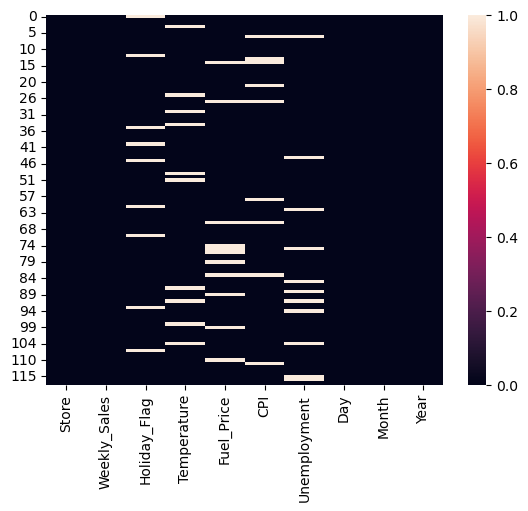

In [26]:

plt.Figure(figsize=(20,6))
sns.heatmap(data2.isnull())
plt.show

## Import de librairies de visualisation

In [23]:
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

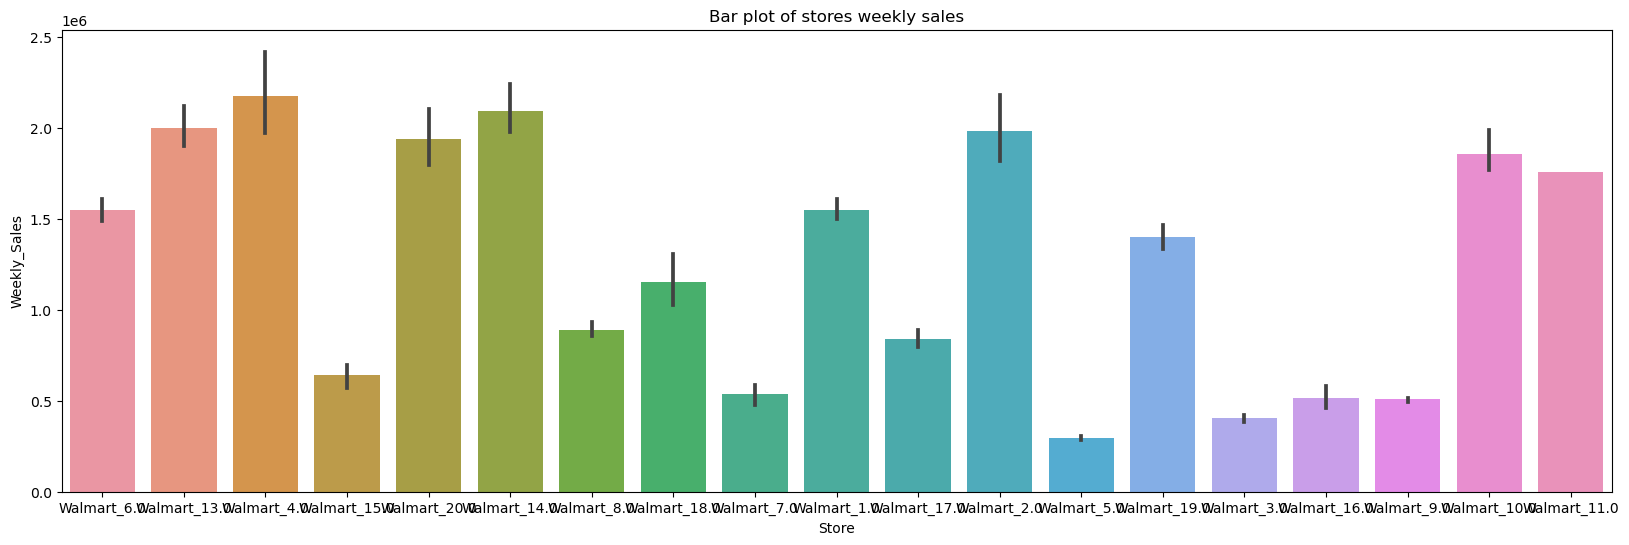

In [24]:
plt.figure(figsize=(20,6))
fig = sns.barplot(data = data2, x = 'Store', y = 'Weekly_Sales')
fig.set_title("Bar plot of stores weekly sales")
plt.show()

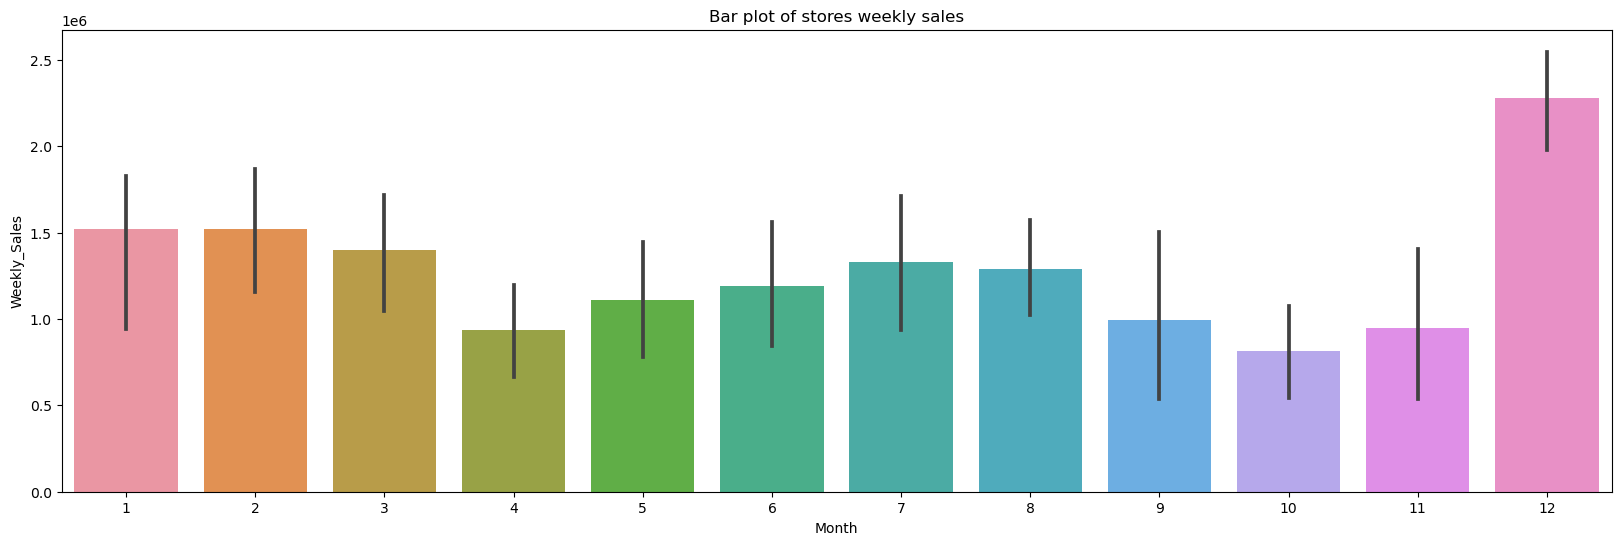

In [25]:
plt.figure(figsize=(20,6))
fig = sns.barplot(data = data2, x = 'Month', y = 'Weekly_Sales')
fig.set_title("Bar plot of stores weekly sales")
plt.show()

## Preprossesing

In [27]:

import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import  OneHotEncoder, StandardScaler, LabelEncoder
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LogisticRegression ,Ridge,Lasso
from sklearn.metrics import accuracy_score
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning) # to avoid deprecation warnings


In [28]:
data2.head()

,Store,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,Day,Month,Year
0,Walmart_6.0,1572117.54,NaN,59.61,3.045,214.777523,6.858,18,2,2011
1,Walmart_13.0,1807545.43,0.0,42.38,3.435,128.616064,7.470,25,3,2011
2,Walmart_6.0,1644470.66,0.0,78.89,2.759,212.412888,7.092,28,5,2010
3,Walmart_4.0,1857533.70,0.0,NaN,2.756,126.160226,7.896,28,5,2010
4,Walmart_15.0,695396.19,0.0,69.80,4.069,134.855161,7.658,3,6,2011


In [29]:
target_variable = 'Weekly_Sales'

X = data2.drop(target_variable, axis = 1)
Y = data2.loc[:,target_variable]


In [30]:

# Divide dataset Train set & Test set 
print("Dividing into train and test sets...")
# WARNING : don't forget stratify=Y for classification problems
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=0)
print("...Done.")
print()



Dividing into train and test sets...
...Done.



In [31]:


numeric_features = ['Temperature', 'Fuel_Price', 'CPI', 'Unemployment', 'Year', 'Month', 'Day']
categorical_features = ['Store', 'Holiday_Flag']

numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')), 
    ('scaler', StandardScaler())
])

categorical_transformer = Pipeline(
    steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')), 
    ('encoder', OneHotEncoder(drop='first'))                    # , handle_unknown = 'ignore'
    ])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ])


X_train = preprocessor.fit_transform(X_train)
print("...Done")


X_test = preprocessor.transform(X_test)
print("...Done")

...Done
...Done


In [32]:
X_train

array([[ 1.52824945, -1.36747759,  0.98628145, ...,  0.        ,
         1.        ,  0.        ],
       [-0.41637335, -0.87752797, -1.15855666, ...,  0.        ,
         0.        ,  0.        ],
       [ 0.80991757, -0.75994006, -1.16286465, ...,  0.        ,
         0.        ,  0.        ],
       ...,
       [-0.53776496, -1.11052623,  1.00040162, ...,  0.        ,
         1.        ,  0.        ],
       [ 0.93307702, -1.44151442,  0.98731828, ...,  1.        ,
         0.        ,  0.        ],
       [-1.02097426,  0.74910476,  0.20541113, ...,  0.        ,
         0.        ,  0.        ]])

## Partie 2 : Régression linéaire pour la prédiction des ventes (Baseline model)

In [33]:

from sklearn.linear_model import LinearRegression


In [34]:


regressor = LinearRegression()
regressor.fit(X_train, Y_train)



LinearRegression()

In [35]:


# Predictions on training set
Y_train_pred =regressor.predict(X_train)

# Predictions on test set
Y_test_pred = regressor.predict(X_test)



In [36]:
Y_train_pred

array([ 355585.09124367, 1159355.29938788, 1403098.60982156,
       2066897.86334844, 1925751.39058183, 1993378.09109697,
       2170861.80479594, 1583913.14514438,  608309.47251647,
       2435430.82890442, 1425012.44373189, 2050457.39423482,
       1963010.32321674, 1988442.98996716, 1292993.22892673,
       1895015.95229027,  577940.5575407 , 1356732.09545341,
       1370325.28797105,  922168.7875471 , 2118430.29683601,
        330062.81192988, 1976468.41972023,  363264.01495491,
       1650427.27893564, 1847044.77914   , 2037621.67177058,
       2047708.28745338, 2074840.9320166 ,  683658.94625479,
        606434.1042874 , 1151700.92166614,  370649.67457154,
        403311.09748353, 1538480.70206245, 1983747.60606973,
       2427756.87804595,  429794.14134814, 1620329.82185334,
       1560398.34734786,  507856.88236816,  317368.86338655,
        403695.24855286, 1491505.6134957 ,  756685.67597289,
        411578.63715934, 1994109.78023765, 2162634.00847892,
       1757242.51      ,

In [37]:
from sklearn.metrics import r2_score

In [38]:
# Print R^2 scores
print("R2 score on training set : ", r2_score(Y_train, Y_train_pred))
print("R2 score on test set : ", r2_score(Y_test, Y_test_pred))

R2 score on training set :  0.9727237843593463
R2 score on test set :  0.93961900739866


In [39]:

import sklearn.metrics as metrics

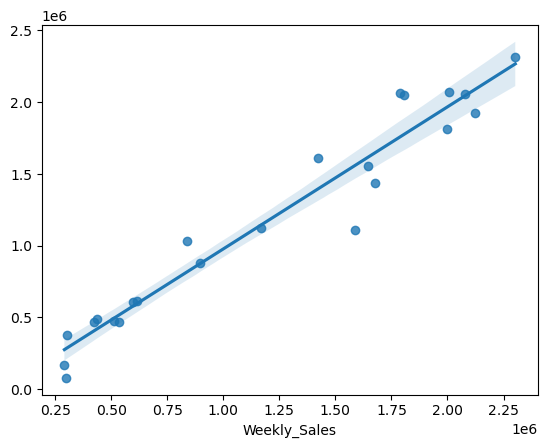

In [40]:
sns.regplot(x=Y_test, y=Y_test_pred)

# Show the plot
plt.show()

## Analyse des coefficient 

In [41]:
lis = preprocessor.transformers_[1][1].named_steps['encoder'].get_feature_names_out().tolist()
lis

['x0_Walmart_10.0',
 'x0_Walmart_11.0',
 'x0_Walmart_13.0',
 'x0_Walmart_14.0',
 'x0_Walmart_15.0',
 'x0_Walmart_16.0',
 'x0_Walmart_17.0',
 'x0_Walmart_18.0',
 'x0_Walmart_19.0',
 'x0_Walmart_2.0',
 'x0_Walmart_20.0',
 'x0_Walmart_3.0',
 'x0_Walmart_4.0',
 'x0_Walmart_5.0',
 'x0_Walmart_6.0',
 'x0_Walmart_7.0',
 'x0_Walmart_8.0',
 'x0_Walmart_9.0',
 'x1_1.0']

In [42]:
all_column = numeric_features + preprocessor.transformers_[1][1].named_steps['encoder'].get_feature_names_out().tolist()


In [43]:
# Creating a DataFrame to store the coefficients
df_coef = pd.DataFrame()

# Adding the Features names
df_coef['Features'] = all_column

# Adding the coefficients in an order matching the feature names based on the preprocessor order
df_coef['Coefficients'] = regressor.coef_

# We want absolute values of the coefficients to sort them from the most important to the least important
df_coef['Coefficients'] = df_coef['Coefficients'].abs()
df_coef.sort_values(by='Coefficients', ascending=False, inplace=True)


In [44]:
df_coef

,Features,Coefficients
20,x0_Walmart_5.0,1.365747e+06
18,x0_Walmart_3.0,1.206228e+06
24,x0_Walmart_9.0,1.172391e+06
12,x0_Walmart_16.0,1.154682e+06
13,x0_Walmart_17.0,1.097046e+06
11,x0_Walmart_15.0,1.029658e+06
22,x0_Walmart_7.0,1.000066e+06
23,x0_Walmart_8.0,7.143415e+05
14,x0_Walmart_18.0,6.019834e+05
10,x0_Walmart_14.0,5.468244e+05


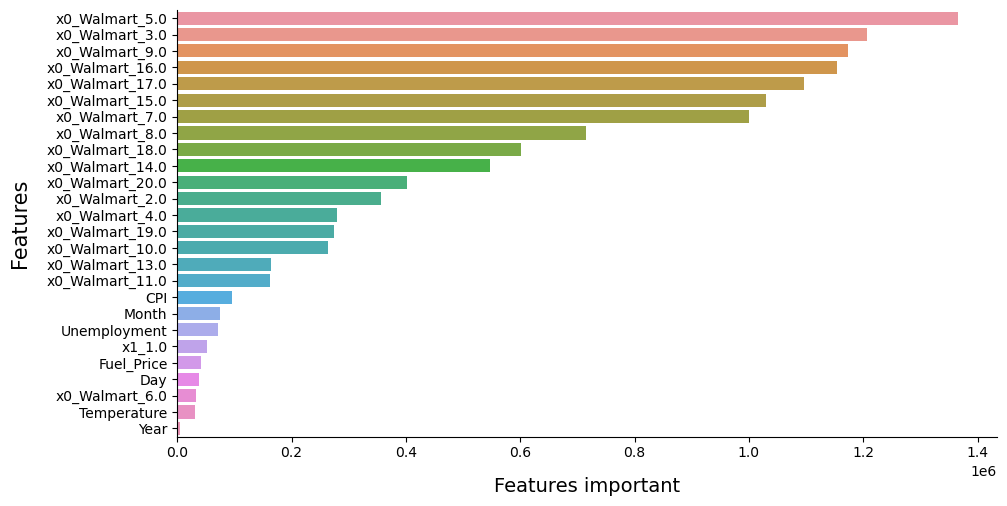

In [45]:
sns.catplot(y ='Features', x='Coefficients',data=df_coef, kind="bar", aspect=1/0.5)
plt.xlabel("Features important",labelpad = 12, fontsize = 14)
plt.ylabel("Features",labelpad = 12, fontsize = 15)
plt.show()

### Conclusion



les features les plus importantes correspondent aux magasins.

## Part 3 :  Lutter contre le surapprentissage 

In [46]:


# Instanciating 4 models of ridge regression with different alpha values

ridge_reg_small_alpha = Ridge(alpha = 0.01)
ridge_reg_medium_alpha = Ridge(alpha = 100)
ridge_reg_large_alpha = Ridge(alpha = 1000)

lasso_reg_small_alpha=Lasso(alpha = 0.01)
lasso_reg_medium_alpha=Lasso(alpha = 100)
lasso_reg_large_alpha=Lasso(alpha = 1000)

ridge_reg_small_alpha.fit(X_train, Y_train)
ridge_reg_medium_alpha.fit(X_train, Y_train)
ridge_reg_large_alpha.fit(X_train, Y_train)
lasso_reg_small_alpha.fit(X_train, Y_train)
lasso_reg_medium_alpha.fit(X_train, Y_train)
lasso_reg_large_alpha.fit(X_train, Y_train)



Lasso(alpha=1000)

In [47]:


print("Score on training: \n")
print("Linear Regression R2 score : {} \n".format(r2_score(Y_train, Y_train_pred)))

print("Ridge with small Alpha score : {}".format(ridge_reg_small_alpha.score(X_train,   Y_train))) # 0.01
print("Ridge with medium Alpha score : {}".format(ridge_reg_medium_alpha.score(X_train,Y_train)))    # 100
print("Ridge with large Alpha score : {}\n".format(ridge_reg_large_alpha.score(X_train,Y_train)))    # 1000


print("Lasso with small Alpha score : {}".format(lasso_reg_small_alpha.score(X_train,   Y_train))) # 0.01
print("Lasso with medium Alpha score : {}".format(lasso_reg_medium_alpha.score(X_train,Y_train)))    # 100
print("Lasso with large Alpha score : {}".format(lasso_reg_large_alpha.score(X_train,Y_train)))    # 1000



Score on training: 

Linear Regression R2 score : 0.9727237843593463 

Ridge with small Alpha score : 0.972673902637044
Ridge with medium Alpha score : 0.1718414302863558
Ridge with large Alpha score : 0.03131355187873108

Lasso with small Alpha score : 0.9727237843591148
Lasso with medium Alpha score : 0.972701010929137
Lasso with large Alpha score : 0.9707545333799009


### Question bonus 

In [49]:
from sklearn.model_selection import  GridSearchCV, cross_val_score

In [50]:
# GridSearch avec LASSO

params = {'alpha': np.arange(0, 10000, 100)} # determine the range of parameters to try # np.arange(0, 1000, 100)
lasso = Lasso() # create an instance of the model

grid_lasso = GridSearchCV(lasso, params, cv = 10) # , verbose = 0
grid_lasso_fit = grid_lasso.fit(X_train, Y_train)

print("Optimal value for alpha : ", grid_lasso_fit.best_params_)

print('Train score for the best model : ', grid_lasso_fit.best_estimator_.score(X_train,Y_train))
print('Test score for the best model : ', grid_lasso_fit.best_estimator_.score(X_test,Y_test))

c:\Users\edouard\anaconda3\Lib\site-packages\sklearn\base.py:1151: UserWarning:

With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator

c:\Users\edouard\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:628: UserWarning:

Coordinate descent with no regularization may lead to unexpected results and is discouraged.

c:\Users\edouard\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:628: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.444e+11, tolerance: 3.715e+09 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV instead.

c:\Users\edouard\anaconda3\Lib\site-packages\sklearn\base.py:1151: UserWarning:

With alpha=0, this algorithm d

Optimal value for alpha :  {'alpha': 900}
Train score for the best model :  0.9710959610687357
Test score for the best model :  0.954658495865127


In [51]:
# GridSearch avec LASSO

ridge_params = {'alpha': np.arange(0, 1, 0.01)} # determine the range of parameters to try # np.arange(0, 1000, 100)
ridge = Ridge() # create an instance of the model

grid_ridge = GridSearchCV(ridge, ridge_params, cv = 10) # , verbose = 0
grid_ridge_fit = grid_ridge.fit(X_train, Y_train)

print("Optimal value for alpha : ", grid_ridge_fit.best_params_)

print('Train score for the best model : ', grid_ridge_fit.best_estimator_.score(X_train,Y_train))
print('Test score for the best model : ', grid_ridge_fit.best_estimator_.score(X_test,Y_test))

Optimal value for alpha :  {'alpha': 0.05}
Train score for the best model :  0.9719778426311827
Test score for the best model :  0.9493574999625631


In [52]:
# Checking the cross validation score
lasso_scores = cross_val_score(grid_lasso_fit.best_estimator_, X_train, Y_train, cv = 10)

print(f'LASSO best_estimator {grid_lasso_fit.best_params_}: The cross-validated R2-score is : ', lasso_scores.mean())
print(f'LASSO best_estimator {grid_lasso_fit.best_params_}: The standard deviation is : ', lasso_scores.std())
print()

ridge_scores = cross_val_score(grid_ridge_fit.best_estimator_, X_train, Y_train, cv = 10)

print(f'RIDGE best_estimator {grid_ridge_fit.best_params_}: The cross-validated R2-score is : ', ridge_scores.mean())
print(f'RIDGE best_estimator {grid_ridge_fit.best_params_}: The standard deviation is : ', ridge_scores.std())

LASSO best_estimator {'alpha': 900}: The cross-validated R2-score is :  0.9208541236303647
LASSO best_estimator {'alpha': 900}: The standard deviation is :  0.06903676170306113

RIDGE best_estimator {'alpha': 0.05}: The cross-validated R2-score is :  0.9173096932681044
RIDGE best_estimator {'alpha': 0.05}: The standard deviation is :  0.08031121571412324


Les deux modèles donnent de trés bon résultats aussi bien avec les régularisations Ridge ou Lasso. Il faut malgrè tout prendre en compte la petite taille de notre échentillon de données ( 113 enregistrements ).